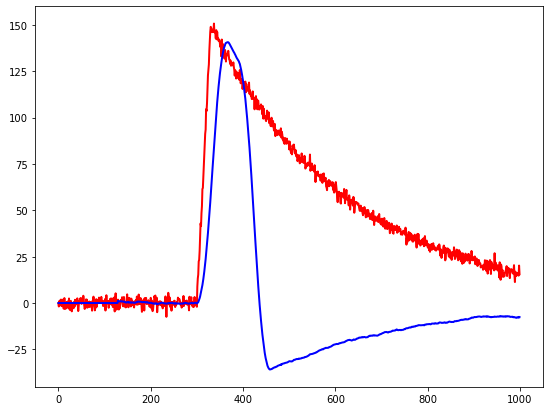

In [4]:
import numpy as np
import math
import setup
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 7]
plt.subplot(121)

data = setup.signalConstruction()   
plt.plot(data, 'r', lw=2)

dataFiltered = setup.trapFilter(data, tGap = 50, tPeaking= 40)
plt.plot(dataFiltered, 'b', lw=2)

plt.show()

In [2]:
a = [1,2,3,4]
sum(a[0:4])

10